In [183]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
%matplotlib inline

In [59]:
#pip install geopandas

# Limpeza e leitura dos dados

In [84]:
#ler os dados com geopandas
data = gpd.read_file('UNC_21_BR_CEM_V2.shp')
data.head(5)

,ID,AREA,DATA,GRI,GEOC_UF,SIGLA_UF,MUN,AREA_KM2,CATEG,INSTANC,...,NOM_UC_A,OBS,ANO,RESTR,RESTR_NM,BIOMA,B_HIDRO,ALT_APRO,GESTAO,geometry
0,257701,900.997133,672,NORTE,15,PA,ITAITUBA,900.997192,PARNA,FEDERAL,...,Amazônia,RECOBERTO POR TERRA INDIGENA,1974.0,PROT_INT,3.0,AMAZONIA,AMAZONAS-SOLIMOES,100 - 249,ICMBIO,"POLYGON ((-56.66375 -3.99424, -56.66476 -3.999..."
1,257716,2117.032830,657,NORTE,13,AM,PARINTINS,2117.032710,APA,ESTADUAL,...,Nhamundá,NaN,1990.0,USO_SUST,12.0,AMAZONIA,AMAZONAS-SOLIMOES,3 - 99,SECRETARIA DO MEIO AMBIENTE DO AM,"POLYGON ((-57.04853 -2.50986, -57.04920 -2.504..."
2,257730,6174.472800,217,NORTE,15,PA,FARO,6174.472160,FLOES,ESTADUAL,...,Faro,NaN,2006.0,USO_SUST,8.0,AMAZONIA,AMAZONAS-SOLIMOES,100 - 249,INSTITUTO DE DESENVOLVIMENTO FLORESTAL E DA BI...,"POLYGON ((-57.14677 -0.97402, -57.12910 -0.976..."
3,257749,4426.075700,218,NORTE,15,PA,ORIXIMINA,4426.076170,FLONA,FEDERAL,...,Saracá-Taquera,NaN,1989.0,USO_SUST,8.0,AMAZONIA,AMAZONAS-SOLIMOES,3 - 99,ICMBIO,"POLYGON ((-56.32440 -1.47692, -56.31971 -1.489..."
4,257771,4106.434830,216,NORTE,15,PA,ORIXIMINA,4106.435050,REBIO,FEDERAL,...,Rio Trombetas,NaN,1979.0,PROT_INT,2.0,AMAZONIA,AMAZONAS-SOLIMOES,3 - 99,ICMBIO,"POLYGON ((-57.04951 -1.08838, -57.04349 -1.053..."


In [191]:
#data.plot()

In [80]:
#verificando ha valores nulos em bioma
temm_nulos = data['BIOMA'].isnull().any()

if temm_nulos:
    print("A coluna possui valores nulos.")
else:
    print("A coluna não possui valores nulos.")

A coluna não possui valores nulos.


In [62]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [63]:
#pip install descartes

#mapa

In [210]:
#tirar as bordas de marcação x e y

#ax =data.plot(figsize=(10, 8),facecolor='white', edgecolor='black')
#ax.axis('on')
data.to_crs(epsg = 3857, inplace= True)

In [200]:

#ax2 =data.plot(figsize=(10, 9),cmap='hsv', column='BIOMA', edgecolor='black')
#ax2.axis('on')
#plt.title('Biomas')

In [201]:
#filtrando somente as informaçoes amazonia e mata atlatica da coluna bioma
filtre_data = data[data['BIOMA'].isin(['AMAZONIA','MATA ATLANTICA'])]

cores = {'AMAZONIA': 'green', 'MATA ATLANTICA': 'yellow'}
map_cor = ListedColormap([cores[bioma] for bioma in filtre_data['BIOMA']])
filtre_data.to_crs(epsg = 3857, inplace= True)
#ax3 = filtre_data.plot(figsize=(10,9),cmap=map_cor,column='BIOMA',edgecolor='black')
#plt.title('Comparação entre Mata Atlântica e Amazônia')

C:\Users\andressa de paula\anaconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [82]:
#verificando se tem valores nulos em categ
tem_nulos = data['CATEG'].isnull().any()

if tem_nulos:
    print("A coluna possui valores nulos.")
else:
    print("A coluna não possui valores nulos.")

A coluna possui valores nulos.


In [91]:
#removendo valores nulos da coluna Categ
gdf_cleaned = data.dropna(subset=['CATEG'])

#verificando quantos valores diferente categ tem
num_valores_unicos = gdf_cleaned['CATEG'].nunique()
print(f"O número de valores únicos na coluna é: {num_valores_unicos}")

O número de valores únicos na coluna é: 14


In [208]:
#plotando todos os valore de categ
#adf =gdf_cleaned.plot(figsize=(10, 9),cmap='Pastel1', column='CATEG', edgecolor='black')
#adf.axis('off')
#plt.title('Unidades de Conservação todas categorias')
gdf_cleaned.to_crs(epsg = 3857, inplace= True)

C:\Users\andressa de paula\anaconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [203]:
#tentando reproduzir a ultima plotagem do professor
categ_data = gdf_cleaned[gdf_cleaned['CATEG'].isin(['APA','PARNA','RPPN','MONA','REBIO','RESEX','ARIE','FLONA','FLOES','RDS','PARES'])]
categ_data.to_crs(epsg = 3857, inplace= True)
cores_categ = {'APA': '#00DFA2',
               'PARNA': '#F6FA70',
               'RPPN': '#7149C6',
               'MONA': '#0F6292',
               'REBIO': '#060047',
               'RESEX': '#F11A7B',
               'ARIE': '#88D548FF',
               'FLONA': '#53596CFF',
               'FLOES': '#3F4889FF',
               'RDS': '#5F636EFF',
               'PARES': '#00204DFF'}
map_cor_categ = ListedColormap([cores_categ[categ] for categ in categ_data['CATEG']])

#ax4 = categ_data.plot(figsize=(10,8),cmap=map_cor_categ,column='CATEG',edgecolor='black')
#plt.title('Distribuição das Unidades de Conservação de acordo com Categorias SNUC')

C:\Users\andressa de paula\anaconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Dados do mapa do Brasil

In [135]:
#ler os dados com geopandas
data_world = gpd.read_file('world.shx')
data_world.head(5)


,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [138]:
#pip install folium
data_world = data_world[['NAME','geometry']]
data_world

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...
241,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
242,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
243,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
244,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


<Axes: >

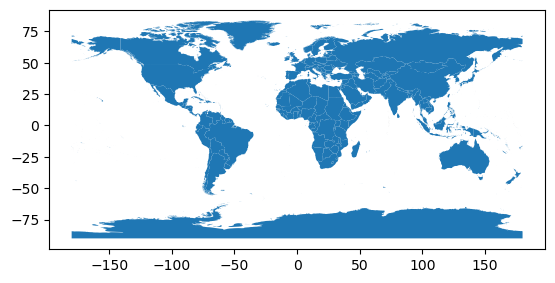

In [139]:
data_world.plot()

In [143]:
brasil_data =data_world[data_world['NAME'] == 'Brazil']


C:\Users\andressa de paula\anaconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

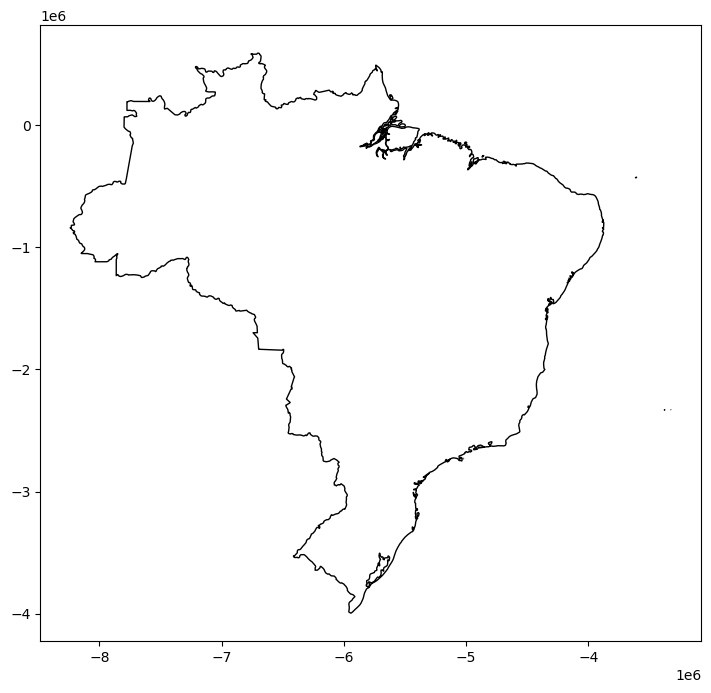

In [185]:
#modificando a projeçao
brasil_data.to_crs(epsg = 3857, inplace= True)
brasil_data.plot(figsize=(10,8),facecolor="white",edgecolor="black")

In [188]:
#fig,(ax1,ax2)=plt.subplots(nrows=2, figsize=(10,8))
#brasil_data.plot(ax=ax1,facecolor="white",edgecolor="black")
#categ_data.plot(ax=ax2,cmap=map_cor_categ,column='CATEG',edgecolor='black')

# Resultados

Text(0.5, 1.0, 'Distribuição das Unidades de Conservação de acordo com Categorias SNUC')

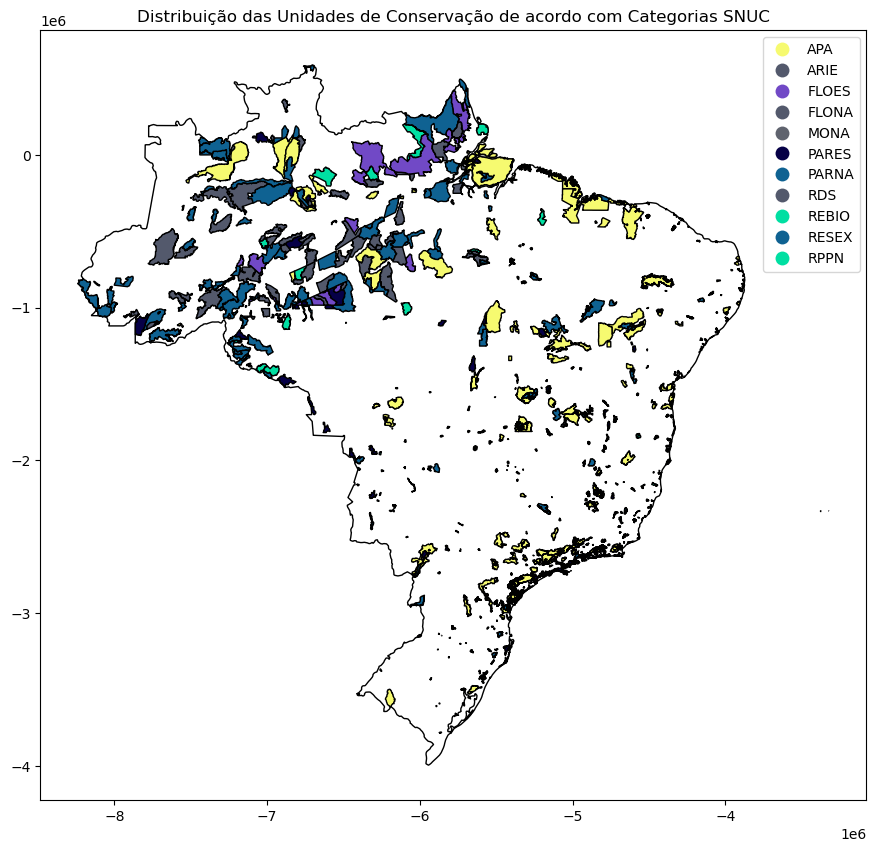

In [190]:
fig,ax=plt.subplots(figsize=(12,10))
brasil_data.plot(ax=ax,facecolor="white",edgecolor="black")
categ_data.plot(ax=ax,cmap=map_cor_categ,column='CATEG',edgecolor='black',legend=True)
plt.title('Distribuição das Unidades de Conservação de acordo com Categorias SNUC')

Text(0.5, 1.0, 'Todos Biomas')

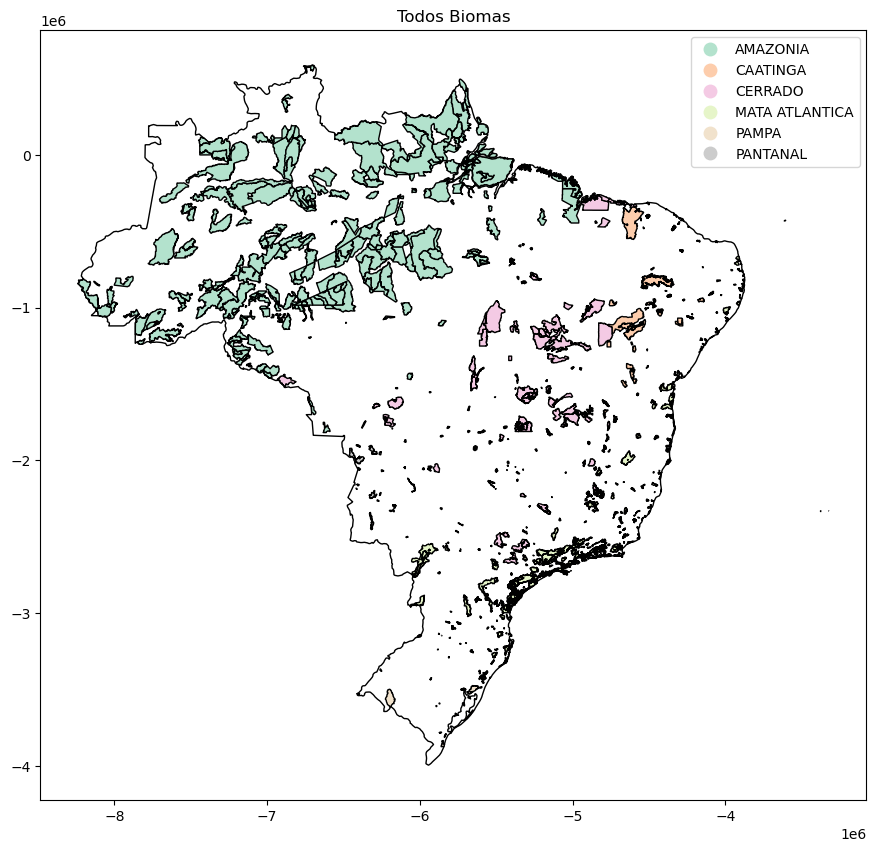

In [211]:
fig,ax=plt.subplots(figsize=(12,10))
brasil_data.plot(ax=ax,facecolor="white",edgecolor="black")
data.plot(ax=ax,cmap='Pastel2',column='BIOMA',edgecolor='black',legend=True)
plt.title('Todos Biomas')

Text(0.5, 1.0, 'Comparação entre Mata Atlântica e Amazônia')

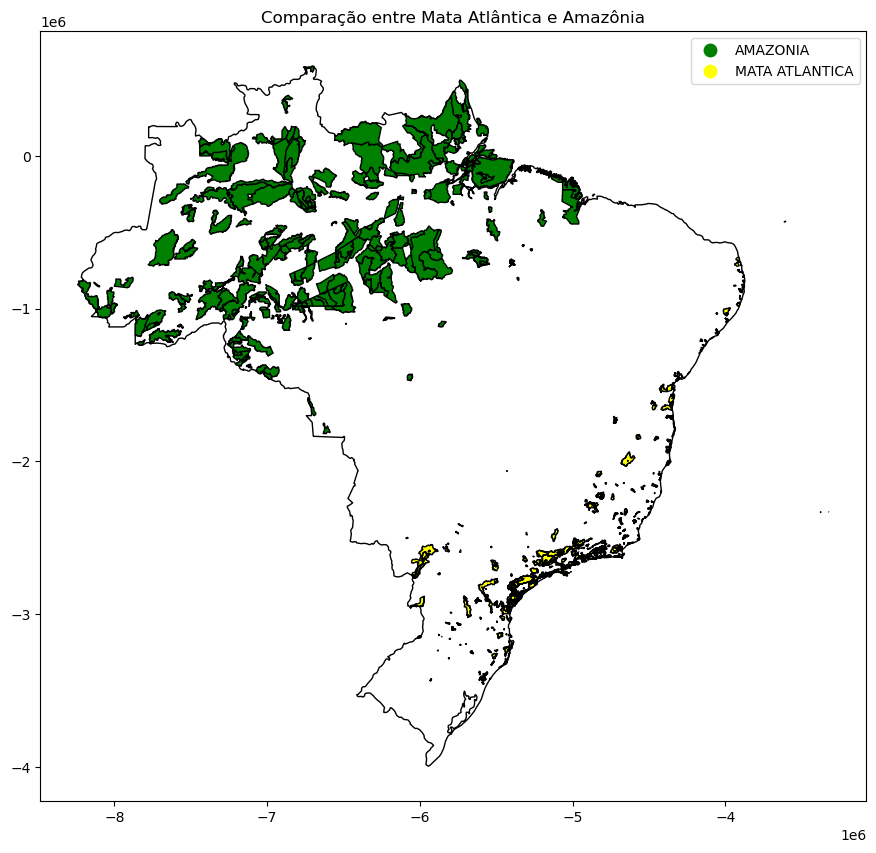

In [204]:
fig,ax=plt.subplots(figsize=(12,10))
brasil_data.plot(ax=ax,facecolor="white",edgecolor="black")
filtre_data.plot(ax=ax,cmap=map_cor,column='BIOMA',edgecolor='black',legend=True)
plt.title('Comparação entre Mata Atlântica e Amazônia')


Text(0.5, 1.0, 'Distribuição das Unidades de Conservação de acordo com Categorias SNUC')

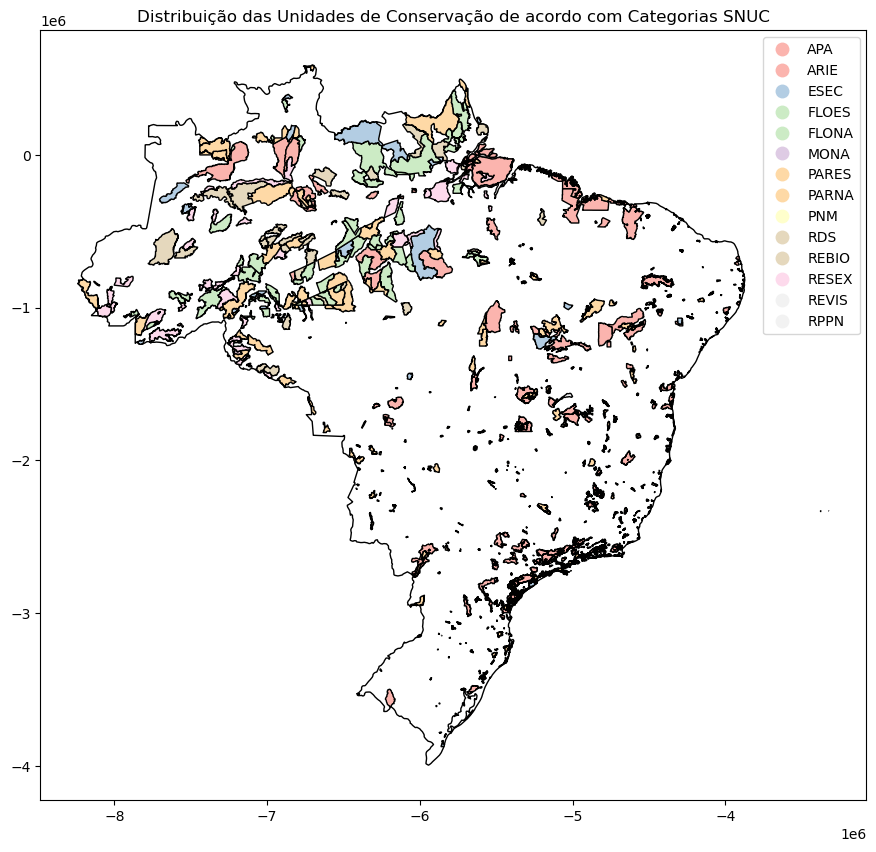

In [209]:
fig,ax=plt.subplots(figsize=(12,10))
brasil_data.plot(ax=ax,facecolor="white",edgecolor="black")
gdf_cleaned.plot(ax=ax,cmap='Pastel1',column='CATEG',edgecolor='black',legend=True)
plt.title('Distribuição das Unidades de Conservação de acordo com Categorias SNUC')